In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams17.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [3]:
len(df)

17743

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17743 entries, 0 to 17742
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              17743 non-null  int64  
 1   N_Person           17743 non-null  int64  
 2   Xcenter            17743 non-null  float64
 3   Ycenter            17743 non-null  float64
 4   PerXmin            17743 non-null  float64
 5   PerYmin            17743 non-null  float64
 6   PerXmax            17743 non-null  float64
 7   PerYmax            17743 non-null  float64
 8   N_Handgun          17743 non-null  int64  
 9   HgXcenter          17743 non-null  float64
 10  HgYcenter          17743 non-null  float64
 11  HgXmin             17743 non-null  float64
 12  HgYmin             17743 non-null  float64
 13  HgXmax             17743 non-null  float64
 14  HgYmax             17743 non-null  float64
 15  Intersection       17743 non-null  object 
 16  Included_Center    177

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              13827
Ycenter              13808
PerXmin              13835
PerYmin              13832
PerXmax              13835
PerYmax              13813
N_Handgun                5
HgXcenter             7280
HgYcenter             7278
HgXmin                7282
HgYmin                7282
HgXmax                7282
HgYmax                7281
Intersection             9
Included_Center          2
Intersection_Area     7806
Hg_Area               7282
Distance             17743
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    16848
0      895
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17743 entries, 0 to 17742
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17743 non-null  int64  
 1   N_Person                      17743 non-null  int64  
 2   Xcenter                       17743 non-null  float64
 3   Ycenter                       17743 non-null  float64
 4   PerXmin                       17743 non-null  float64
 5   PerYmin                       17743 non-null  float64
 6   PerXmax                       17743 non-null  float64
 7   PerYmax                       17743 non-null  float64
 8   N_Handgun                     17743 non-null  int64  
 9   HgXcenter                     17743 non-null  float64
 10  HgYcenter                     17743 non-null  float64
 11  HgXmin                        17743 non-null  float64
 12  HgYmin                        17743 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 0: 'LR'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    16848
0      895
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17743 entries, 0 to 17742
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17743 non-null  int64  
 1   N_Person                      17743 non-null  int64  
 2   Xcenter                       17743 non-null  float64
 3   Ycenter                       17743 non-null  float64
 4   PerXmin                       17743 non-null  float64
 5   PerYmin                       17743 non-null  float64
 6   PerXmax                       17743 non-null  float64
 7   PerYmax                       17743 non-null  float64
 8   N_Handgun                     17743 non-null  int64  
 9   HgXcenter                     17743 non-null  float64
 10  HgYcenter                     17743 non-null  float64
 11  HgXmin                        17743 non-null  float64
 12  HgYmin                        17743 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14194, 28) (14194,)
(3549, 28) (3549,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9776666038556181
mean_test =  0.9764690468391745


,fit_time,score_time,test_score,train_score
0,0.090760,0.002991,0.980282,0.978002
1,0.089730,0.002992,0.969014,0.975497
2,0.091753,0.002992,0.975352,0.976437
3,0.089758,0.002992,0.979577,0.978707
4,0.089758,0.001995,0.971106,0.976908
5,0.089758,0.002992,0.978154,0.976204
6,0.090756,0.002992,0.973925,0.976047
7,0.099732,0.002992,0.980268,0.976047
8,0.092750,0.002992,0.979563,0.980978
9,0.091753,0.002992,0.977449,0.981840


                         feature  importance       std
22        Intersection_Down_left    0.000000  0.000000
20     Intersection_Center_right    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
23           Intersection_Inside    0.000000  0.000000
8                      N_Handgun    0.000304  0.000912
19      Intersection_Center_left    0.000555  0.001665
12                        HgYmin    0.003859  0.006832
14                        HgYmax    0.007824  0.023472
1                       N_Person    0.008396  0.025188
15               Included_Center    0.011757  0.035211
10                     HgYcenter    0.013225  0.026675
24  Intersection_No_intersection    0.013552  0.025129
0                          Frame    0.016401  0.030267
7                        PerYmax    0.018447  0.032569
17                       Hg_Area    0.027562  0.044841
6                        PerXmax    0.029086  0.065843
5                        PerYmin    0.030823  0.040147
16        

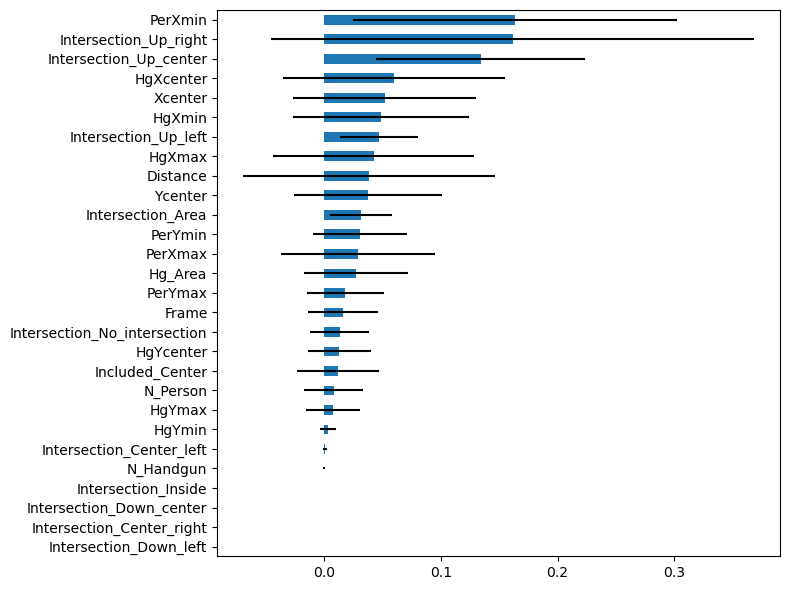

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76       188
           1       0.98      1.00      0.99      3361

    accuracy                           0.98      3549
   macro avg       0.99      0.81      0.87      3549
weighted avg       0.98      0.98      0.98      3549



In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17743 entries, 0 to 17742
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17743 non-null  int64  
 1   N_Person                      17743 non-null  int64  
 2   Xcenter                       17743 non-null  float64
 3   Ycenter                       17743 non-null  float64
 4   PerXmin                       17743 non-null  float64
 5   PerYmin                       17743 non-null  float64
 6   PerXmax                       17743 non-null  float64
 7   PerYmax                       17743 non-null  float64
 8   N_Handgun                     17743 non-null  int64  
 9   HgXcenter                     17743 non-null  float64
 10  HgYcenter                     17743 non-null  float64
 11  HgXmin                        17743 non-null  float64
 12  HgYmin                        17743 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.83527022, -1.00718588,  0.39150227, -1.05193817,  0.40751393,
        -0.80248587,  0.36021875, -1.40419711, -0.49482751,  0.67515479,
        -1.25190039,  0.72635504, -1.17587659,  0.62241581, -1.32343268,
         1.22333671, -0.00684935, -0.62895635, -0.73051622,  2.79460752,
        -0.27989215, -0.0167893 , -0.01061759, -0.52807854, -1.12788382,
        -0.12194913, -0.06110373, -0.13203103],
       [-1.83312119, -1.00718588,  0.39121925, -1.05135012,  0.40654292,
        -0.80079621,  0.36066159, -1.40691969, -0.49482751,  0.67355368,
        -1.25275204,  0.72334446, -1.17652739,  0.62221391, -1.32448667,
         1.22333671, -0.00429074, -0.62280354, -0.72909239,  2.79460752,
        -0.27989215, -0.0167893 , -0.01061759, -0.52807854, -1.12788382,
        -0.12194913, -0.06110373, -0.13203103],
       [-1.83097216, -1.00718588,  0.39183388, -1.05349555,  0.40799525,
        -0.80485208,  0.36038232, -1.40294629, -0.49482751,  0.67337442,
        -1.25416207,  0.7232

In [21]:
print(scaler.mean_)

[8.54000225e+02 8.81192583e-01 3.91159741e+02 3.82244618e+02
 3.04750706e+02 2.46156816e+02 4.77568776e+02 5.18332420e+02
 2.96962182e-01 3.07010569e+02 3.12111503e+02 2.83819865e+02
 2.92796519e+02 3.30201272e+02 3.31426488e+02 4.00552330e-01
 8.55707192e+02 1.97381626e+03 2.36855558e+02 1.13509553e-01
 7.26483684e-02 2.81801274e-04 1.12720509e-04 2.18057826e-01
 5.59882771e-01 1.46536662e-02 3.71977681e-03 1.71335174e-02]


In [22]:
print(scaler.scale_)

[4.65326695e+02 8.74905619e-01 2.14148719e+02 6.90740893e+01
 2.22388827e+02 1.11845073e+02 2.13905787e+02 3.95736831e+01
 6.00132726e-01 1.52367162e+02 9.75026018e+01 1.51777716e+02
 9.92289016e+01 1.53431725e+02 9.62996830e+01 4.90010368e-01
 1.57416399e+03 1.73669929e+03 1.37895180e+02 3.17214650e-01
 2.59558438e-01 1.67845721e-02 1.06163932e-02 4.12926883e-01
 4.96401102e-01 1.20162125e-01 6.08764328e-02 1.29768872e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13307, 28)

In [25]:
y_train.value_counts()

1    12636
0      671
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4436, 28)

In [27]:
y_test.value_counts()

1    4212
0     224
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[2.22044605e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.27545102e-10, 1.00000000e+00],
       ...,
       [2.05305550e-10, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.39192435e-10, 1.00000000e+00]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       224
           1       1.00      1.00      1.00      4212

    accuracy                           1.00      4436
   macro avg       0.99      0.97      0.98      4436
weighted avg       1.00      1.00      1.00      4436



In [32]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9986473284737356
Score test =  0.9961677186654644


In [32]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 